In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Generate data

We generate uniform $x$ in $[0, 1]$ and $y$ is sampled from $N(f(x), \sigma)$, where $f(x) = \exp(\sin(2\pi x))$ and $\sigma = 0.1$.

In [6]:
f = lambda x: np.sin(10*x) / (5*x)#np.exp(np.sin(2*np.pi*x))

np.random.seed(0)

N = 200
x = np.random.uniform(-3, 3, (N, 1))
y = np.random.randn(N, 1) * 0.1 + f(x)

with open('data.txt', 'w') as file:
    for i in range(N):
        file.write(f'{x[i, 0]} {y[i, 0]}\n')

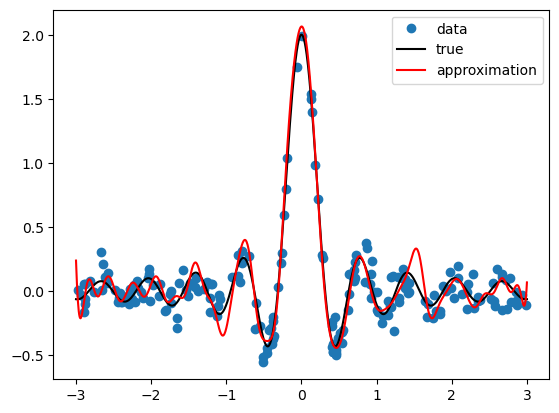

In [7]:
with open('run.txt') as file:
    y_apx = np.array([float(line) for line in file])
with open('run_mh.txt') as file:
    y_apx_mh = np.array([float(line) for line in file])


w = []
c = []
with open("model.txt") as file:
    for i, line in enumerate(file):
        wi, cir, cii = [float(x) for x in line.split()]
        w.append(wi)
        c.append(cir + 1j * cii)
w = np.array(w)
c = np.array(c)

def func(x):
    return np.sum(c[:, None] * np.exp(1j * w[:, None] * x[None, :]), axis=0).real

x_ev = np.linspace(-3, 3, 1000)
plt.plot(x, y, 'o', label='data')
plt.plot(x_ev, f(x_ev), 'k-', label='true')
#plt.plot(x, y_apx, 'rs', label='approximation')
#plt.plot(x, y_apx_mh, 'g^', label='approximation (MH)')
plt.plot(x_ev, func(x_ev), 'r-', label='approximation')
plt.legend()

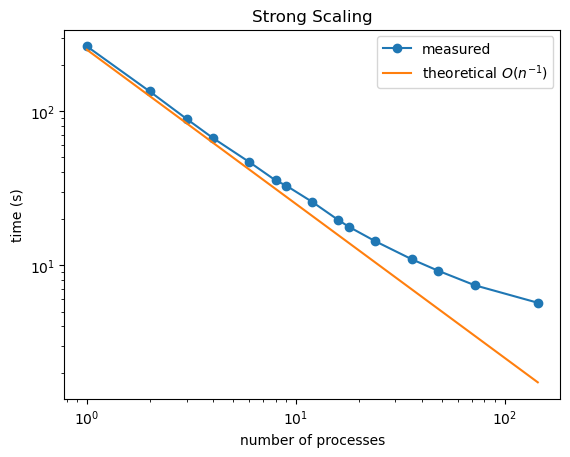

In [8]:
# Strong scaling 
ns = np.array([1, 2, 3, 4, 6, 8, 9, 12, 16, 18, 24, 36, 48, 72, 144])
ts = np.array([263, 134, 89,  67, 46.6, 35.5, 32.8, 25.7, 19.6, 17.7, 14.3, 10.9, 9.2, 7.4, 5.7])


O = lambda n: 250/n

plt.title('Strong Scaling')

plt.plot(ns, ts, 'o-', label='measured')
plt.plot(ns, O(ns), label='theoretical $O(n^{-1})$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("time (s)")
plt.xlabel("number of processes")
plt.legend()
plt.gcf().savefig('strong_scaling.pdf', bbox_inches='tight')
